# Week11 Classification & Decision Tree

We continued learning other algorithms of Supervised Learning. Classification belongs to the category of supervised learning where the targets also provided with the input data. 

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

A decision tree is a largely used non-parametric effective machine learning modeling technique for regression and classification problems. To find solutions a decision tree makes sequential, hierarchical decision about the outcomes variable based on the predictor data.

In week11, we've covered:
* **Logistic Regression, Stochastic Gradient Descent**
* **Decision Tree**


The best way to consolidate the knowledge in your mind is by practicing.<br>Please complete the part marked with <span style="color:green">**# TODO**</span>.

[Google](www.google.com), [Python Documentation](https://docs.python.org/3/contents.html), and [scikit-learn Documentation](https://scikit-learn.org/stable/) are your good friends if you have any python questions.

Download **Week11_classification-and-decision-tree.ipynb** notebook to your local folder and open it with Jupyter Notebook.

### Data Loading and EDA

Install Python SciPy libraries (ex. `numpy`, `pandas`, `matplotlib`, `seaborn`)
    

In [3]:
# TODO
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Load Data

In [4]:
# TODO
df = pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        0  
1596     11.0        0  
1597     10.2        0  
1598     11.0        0  

[1599 rows x 12 columns]

Summarize the dataset -- we are going to take a look at the data in a few different ways:
1. Dimensions of the dataset (Hint: use `shape`)
2. Peek at the data itself (Hint: use `head`)
3. Statistical summary of all attributes (Hint: use `describe`)
4. Breakdown of the data by the class variable (Hint: use `groupby`, `value_counts`)


In [5]:
# TODO
df.shape

(1599, 12)

Data visualization -- use seaborn to plot graphs to help you better understand this dataset

In [6]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.515822   
std         1.741096          0.179060     0.194801        1.406961   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.135710  
std       0.154386     0.169507     1.065668     0.342587  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     0.000000  
75%       3.400000     0.730000    11.100000     0.000000  
max       4.010000     2.000000    14.900000     1.000000

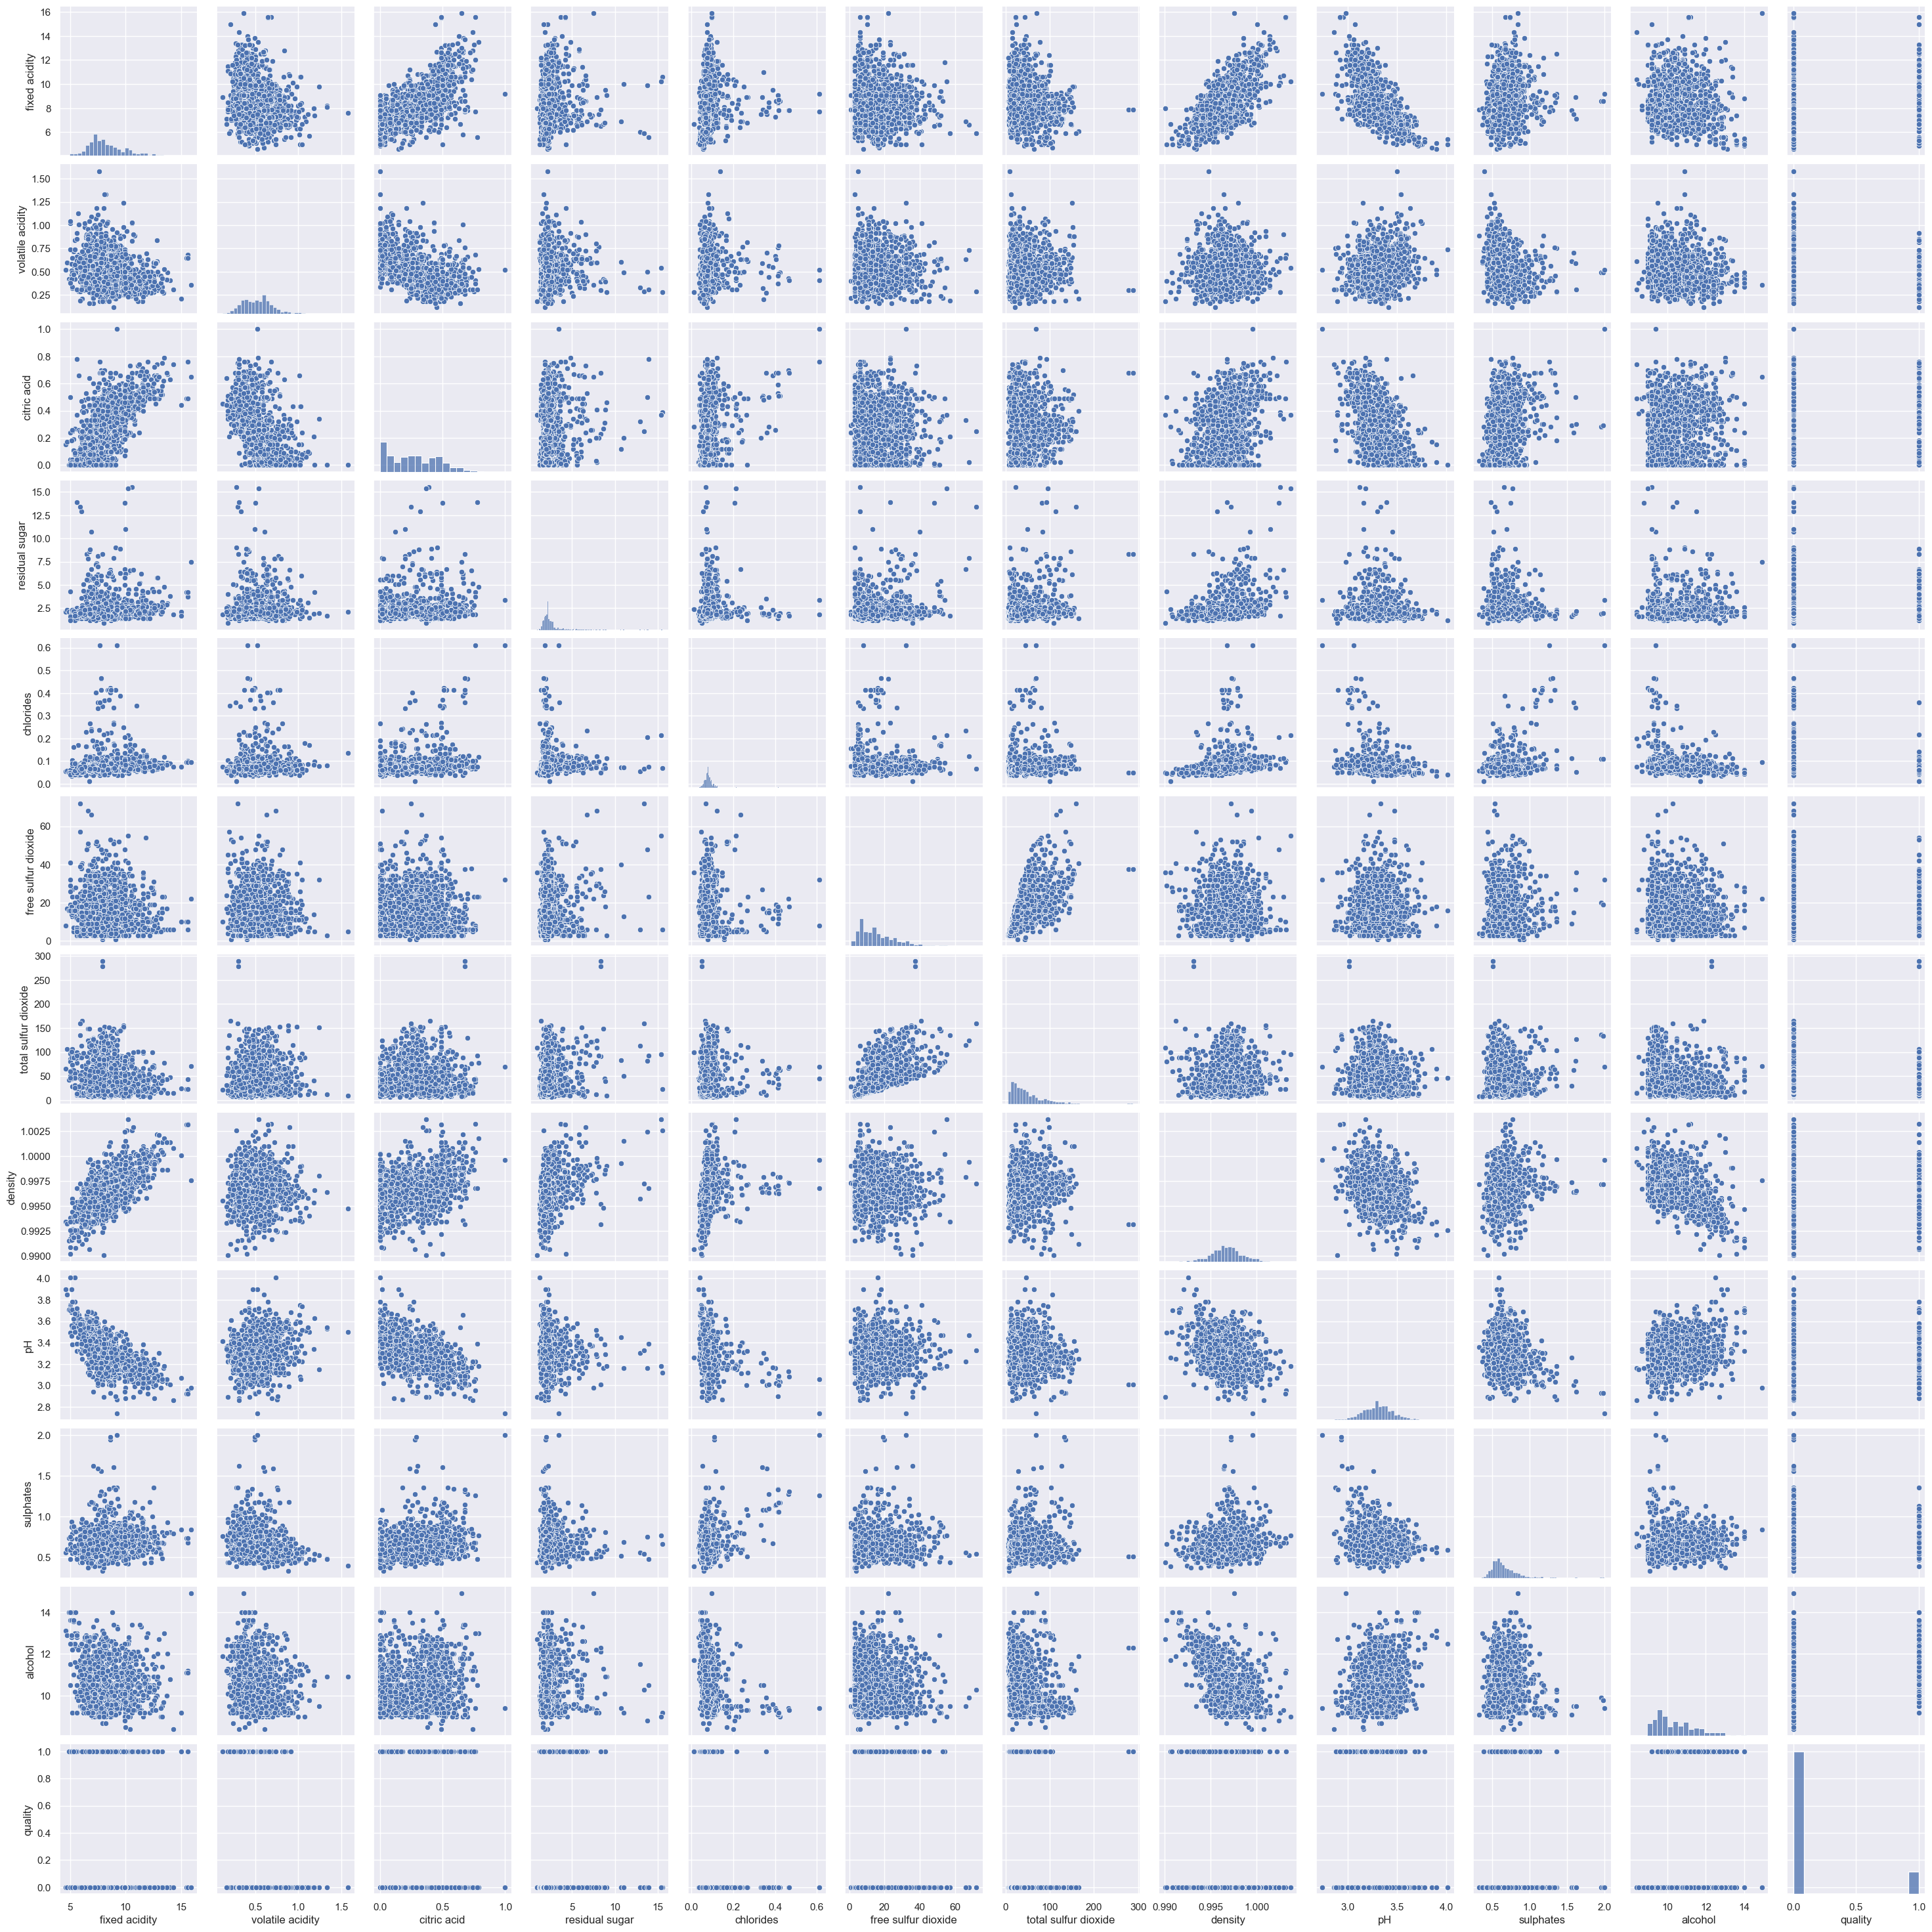

In [9]:
sns.pairplot(df)

In [12]:
for c in df.columns:
    print(c)
    print(df[c].value_counts())
    print("\n\n")

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64



volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64



citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64



residual sugar
2.00     150
2.10     145
1.90     135
2.20     129
1.80     124
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 90, dtype: int64



chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64



free sulfur dioxide
6.0    

In [13]:
for c in df.columns:
    print(c)
    print(df[c].value_counts())
    print("\n\n")

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64



volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64



citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64



residual sugar
2.00     150
2.10     145
1.90     135
2.20     129
1.80     124
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 90, dtype: int64



chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64



free sulfur dioxide
6.0    

In [14]:
# TODO
df.groupby(by=["quality"], dropna=False).mean()


fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
0             8.236831          0.547022     0.254407        2.490593   
1             8.847005          0.405530     0.376498        2.676498   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
0         0.089281            16.172214             48.285818  0.996859   
1         0.075912            13.981567             34.889401  0.996030   

               pH  sulphates    alcohol  
quality                                  
0        3.314616   0.644754  10.251037  
1        3.288802   0.743456  11.518049

In [15]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.098238          0.002260     0.132881   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.120061         -0.270712     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.098238   0.093705            -0.153794   
volatile acidity            0.002260   0.061298            -0.010504   
citric acid                 0.132881   0.203823            -0.060978   
residual sugar              1.000000   0.055154             0.182065   
chlorides                   0.055154   1.000000             0.005562   
free sulfur dioxide         0.182065   0.005562             1.000000   
total sulfur dioxide        0.200283   0.047400             0.667666   
density                     0.337539   0.200632            -0.021946   
pH                         -0.080028  -0.265026             0.070377   
sulphates                   0.005911   0.371260             0.051658   
alcohol                     0.037563  -0.221141            -0.069408   
quality                     0.045267  -0.097308            -0.071747   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.200283  0.337539 -0.080028   0.005911   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.139517 -0.150460 -0.057283   0.199485   

                       alcohol   quality  
fixed acidity        -0.061668  0.120061  
volatile acidity     -0.202288 -0.270712  
citric acid           0.109903  0.214716  
residual sugar        0.037563  0.045267  
chlorides            -0.221141 -0.097308  
free sulfur dioxide  -0.069408 -0.071747  
total sulfur dioxide -0.205654 -0.139517  
density              -0.496180 -0.150460  
pH                    0.205633 -0.057283  
sulphates             0.093595  0.199485  
alcohol               1.000000  0.407315  
quality               0.407315  1.000000

<AxesSubplot:>

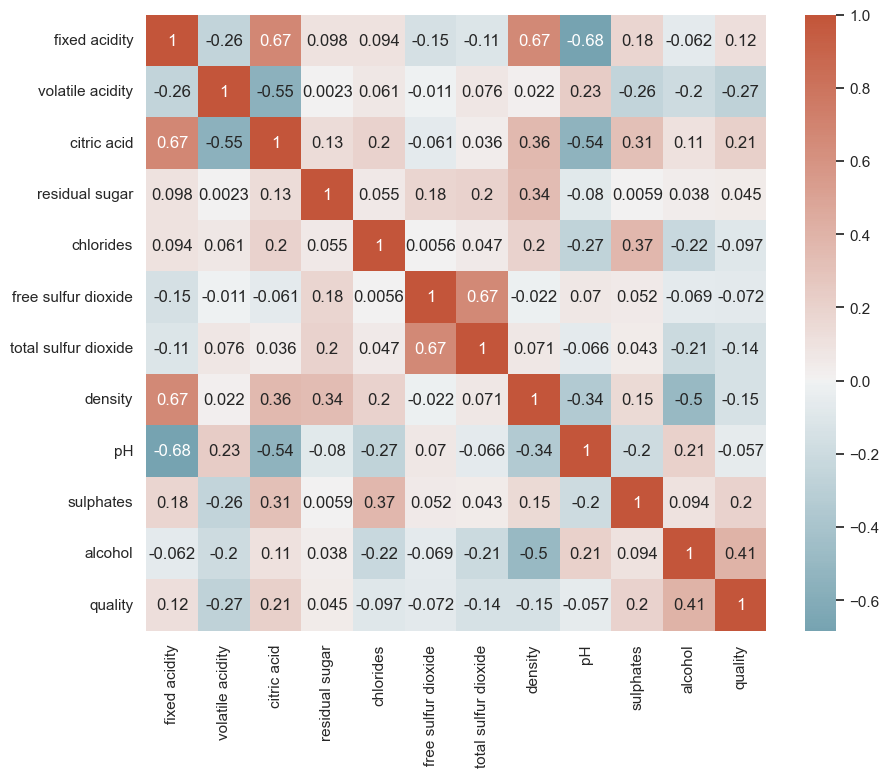

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), center=0, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


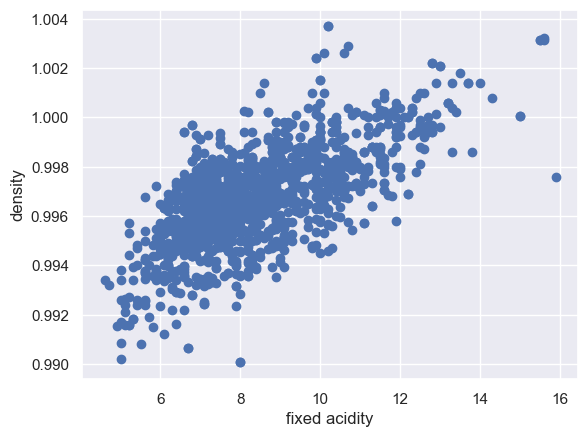

In [17]:
plt.scatter(df['fixed acidity'], df['density'])
plt.xlabel('fixed acidity') 
plt.ylabel('density') 
plt.show()

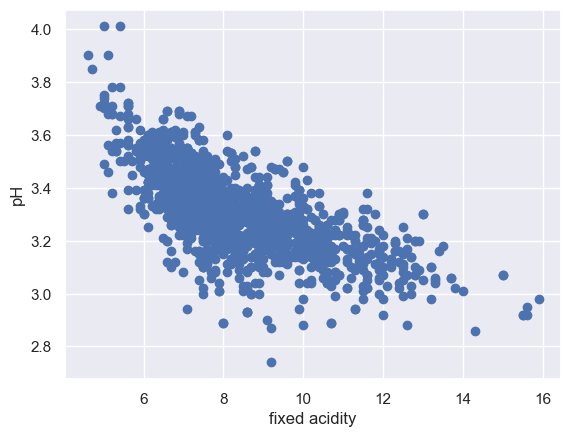

In [18]:
plt.scatter(df['fixed acidity'], df['pH'])
plt.xlabel('fixed acidity') 
plt.ylabel('pH') 
plt.show()

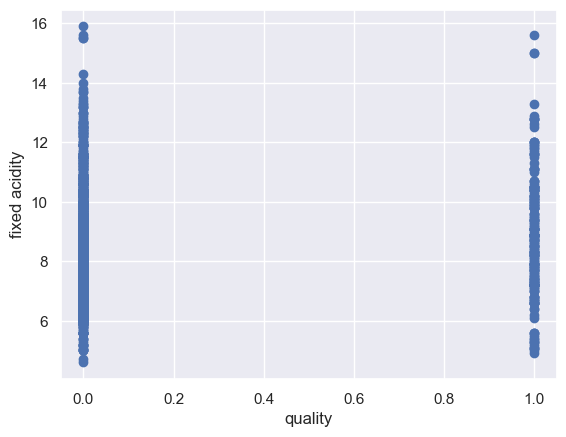

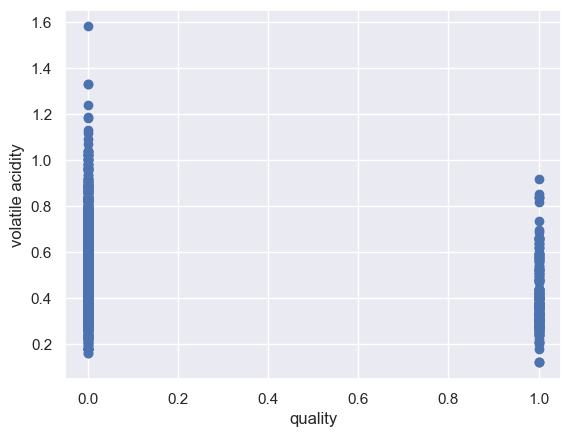

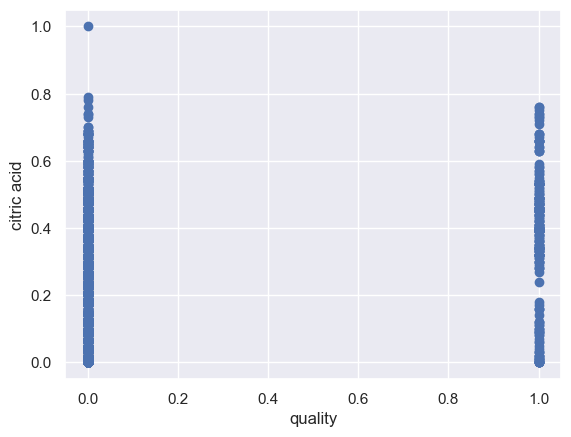

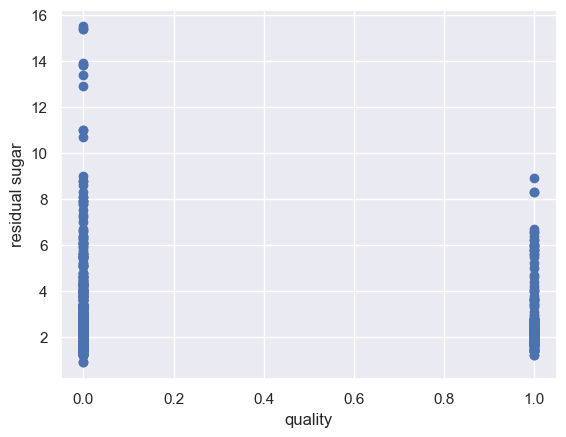

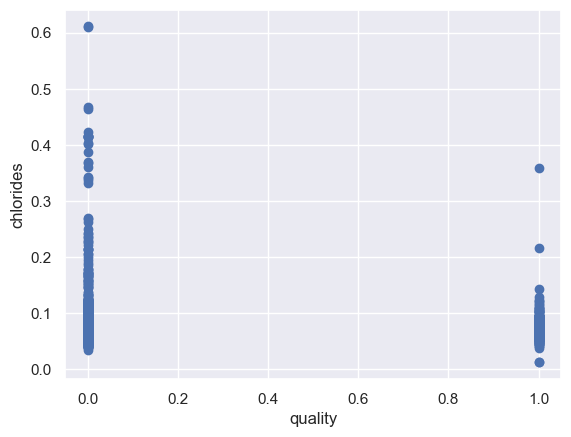

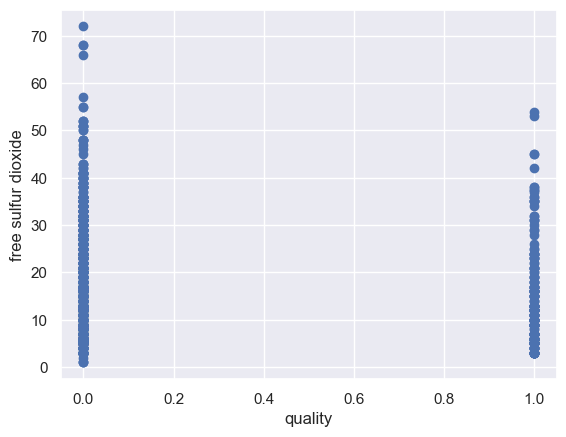

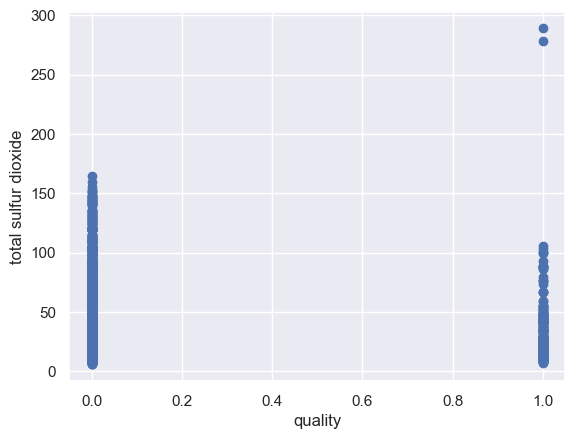

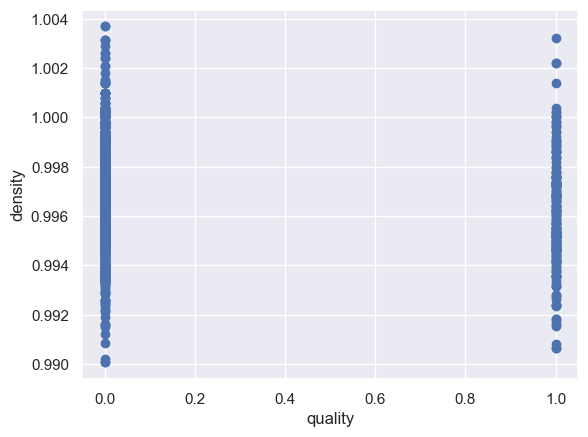

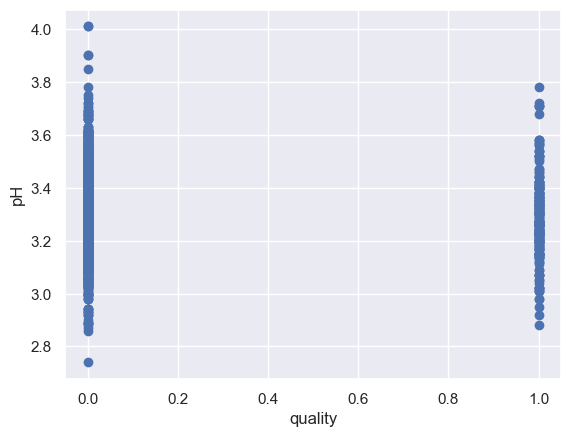

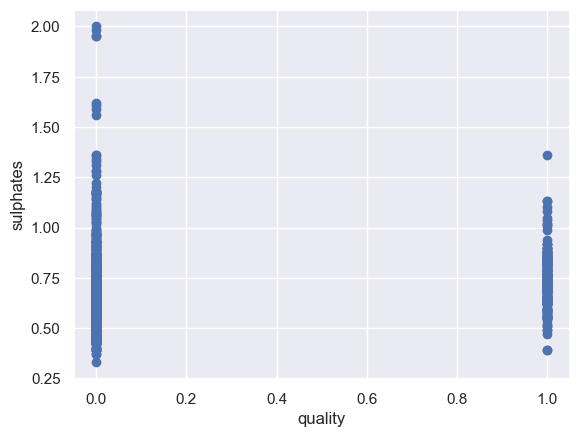

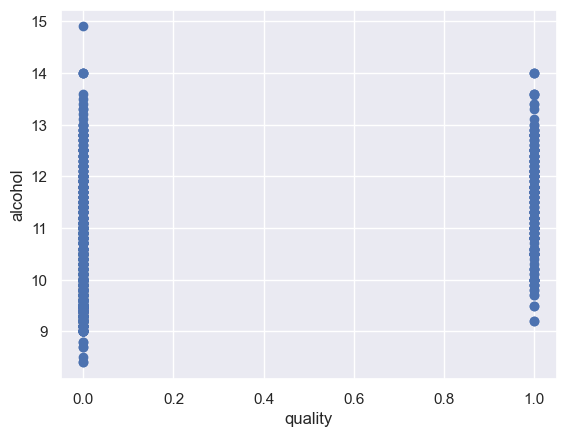

In [19]:
target = 'quality'
features = [ c for c in df.columns if c != target]

for f in features:
    plt.scatter(df[target], df[f])
    plt.xlabel(target) 
    plt.ylabel(f) 
    plt.show()


### Data Preprocessing

Check for missing values, do you think this step is necessary and why?

In [20]:
df.isnull().values.any()

False

Can you think of some ways to handle missing values?

In [21]:
# TODO
# One way would be to remove those.
# Another way would be filling those by generating a model to populate those

Seperate the dataset as response variable and feature variabes

In [22]:
# TODO
target = 'quality'
features = [f for f in df.columns if f != target]
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

Split to training set and testing set (Note: test_size = 0.25, random_state = 42) 

Apply Standard scaling to get optimized result, think of why we need to do this?

In [23]:
# TODO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[features])
scaled =  pd.DataFrame(scaler.transform(df[features]), columns=features)
scaled[target] =[i for i in df[target]]


train_scaled, test_scaled= train_test_split(scaled, test_size=0.25, random_state=42)
train_scaled


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
582        1.942121         -0.211283     1.124700       -0.224542  -0.094931   
626        0.275983          0.403229     0.097691       -0.224542   0.223875   
1030      -0.700719          0.347364    -1.391472       -0.295639   0.075099   
620       -0.011282          0.068040    -0.159061        0.628627  -0.243707   
490        0.563248          1.380862    -0.005010       -0.580029  -0.201199   
...             ...               ...          ...             ...        ...   
1130       0.448342          0.403229    -1.391472       -0.437834  -0.626274   
1294      -0.068735          0.598756    -0.877968       -0.295639  -0.307468   
860       -0.643266          0.514959    -1.083370        0.130945  -0.222453   
1459      -0.241094         -1.831362     0.405794       -0.580029  -0.711289   
1126      -1.447608         -1.328579    -0.056360       -0.580029  -0.520005   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
582             -1.039977             -0.956903  1.724305 -0.784726   
626             -1.039977             -0.956903  1.088288  0.316751   
1030            -0.657454             -0.987312 -0.989366  0.705508   
620              0.011961              1.992767  0.452272 -0.266384   
490              0.777007              0.289865  0.876283 -0.007213   
...                   ...                   ...       ...       ...   
1130            -1.039977             -1.108948  0.505273 -0.849519   
1294             0.872638              0.411500 -0.194345 -0.136798   
860             -0.083669              1.171725  0.378070  1.288643   
1459            -0.848716             -0.956903 -1.148370  0.057580   
1126            -1.231239             -1.078539 -2.780812  0.511130   

      sulphates   alcohol  quality  
582   -1.346377 -1.147981        0  
626   -0.992298 -1.241848        0  
1030  -0.638220  1.010966        1  
620   -0.284141 -0.960246        0  
490    0.069937  0.166161        0  
...         ...       ...      ...  
1130  -0.166115 -0.021574        0  
1294   0.542042  0.447763        0  
860   -0.697233 -0.866379        0  
1459   0.837107  1.386435        1  
1126  -0.697233  2.888311        0  

[1199 rows x 12 columns]

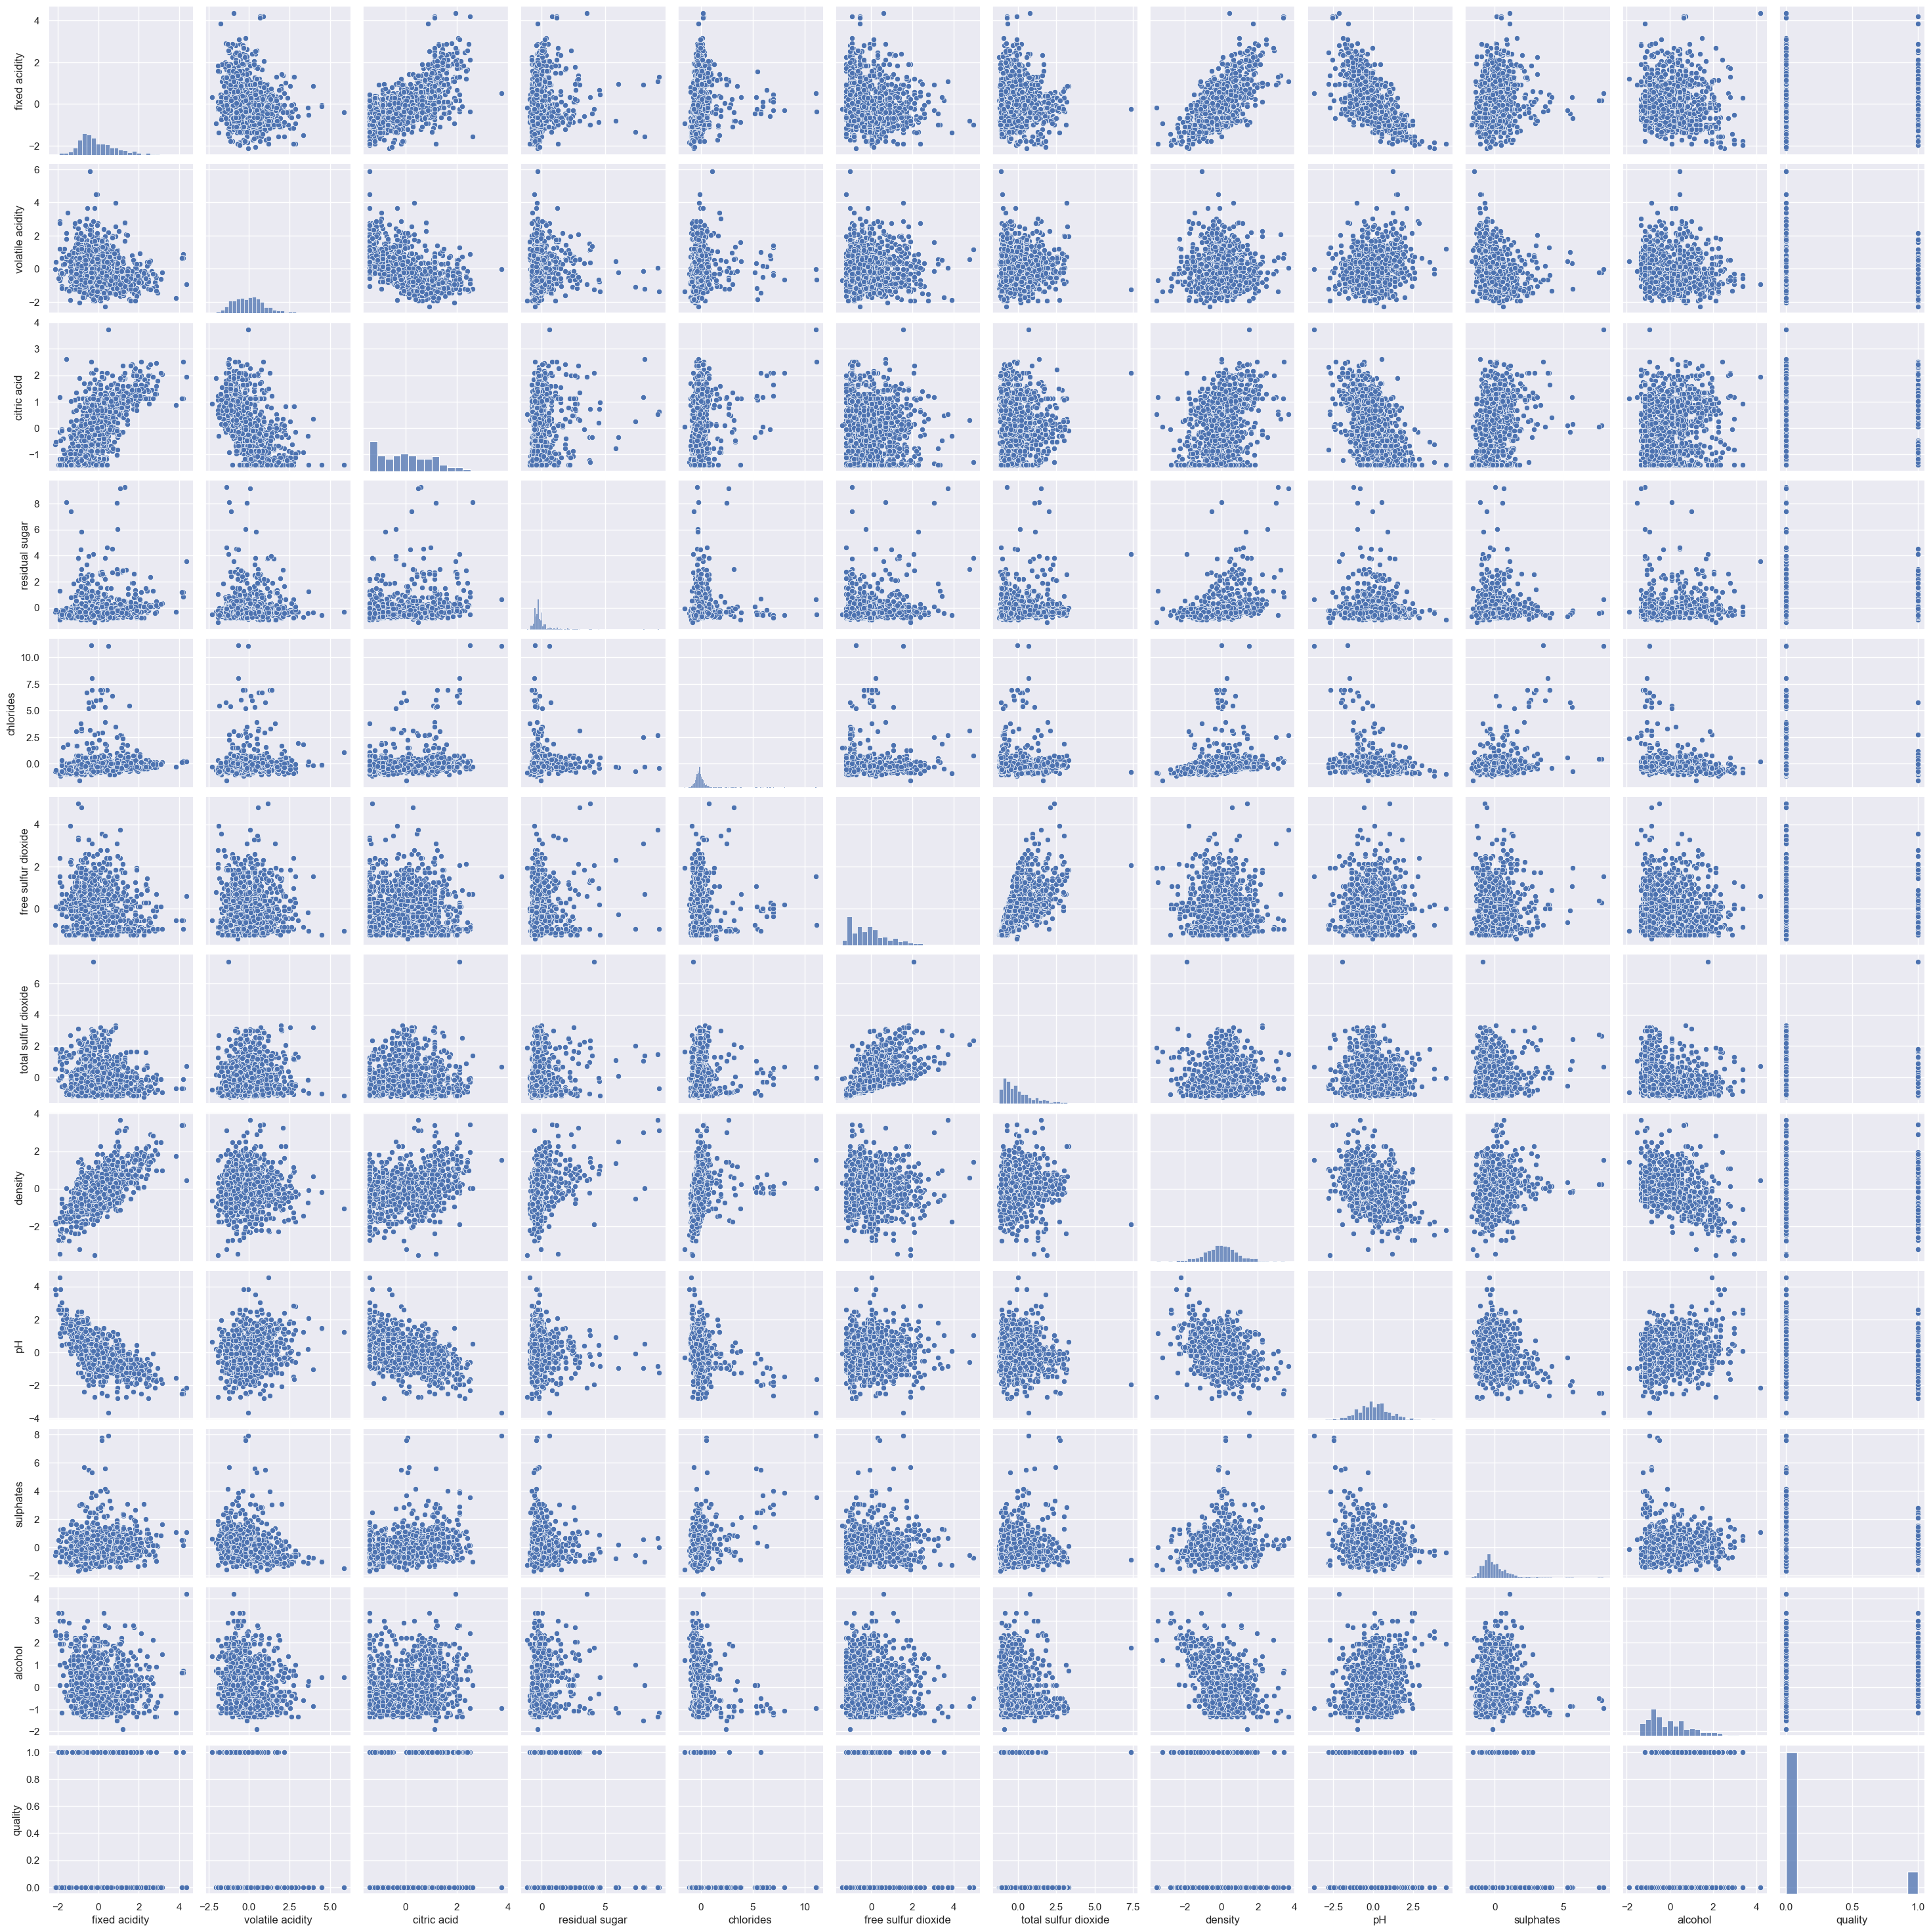

In [24]:
sns.pairplot(train_scaled)

### Modeling

#### Logistic Regression

Train a Binary Classifier and fit with training set

In [25]:
# TODO
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score


In [26]:
def plot_confusion_matrix(real,predicted):
    
    cf = confusion_matrix(real, predicted)
    cf

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(cf,  alpha=0.3)
    for i in range(cf.shape[0]):
        for j in range(cf.shape[1]):
            ax.text(x=j, y=i,s=cf[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

    print("recall_score",recall_score(real, predicted))
    print("accuracy_score",accuracy_score(real, predicted))
    print("f1_score",f1_score(real, predicted))


Perform predictions on test data

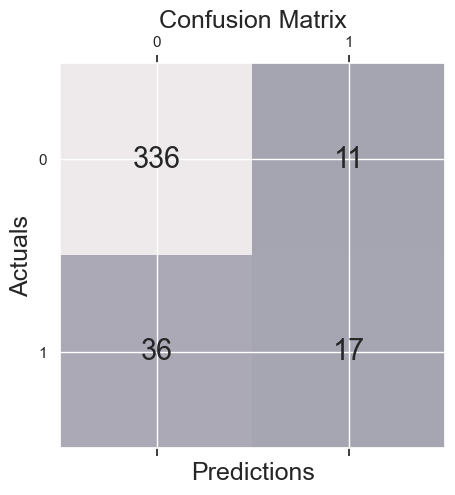

recall_score 0.32075471698113206
accuracy_score 0.8825
f1_score 0.41975308641975306


In [27]:
# Todo

lr_classifier= LogisticRegression(C=1.0, penalty='l2', tol=0.0001)
lr_classifier.fit(train_scaled[features], train_scaled[target])
predicted =lr_classifier.predict(test_scaled[features])
plot_confusion_matrix(test_scaled[target], predicted)


In [60]:
def lr_classifier_test(X_train, y_train, X_test, y_test):
    print("----------------------------------------------------------------")

    lr_classifier= LogisticRegression(C=1.0, penalty='l2', tol=0.0001)
    lr_classifier.fit(X_train,y_train)
    predicted =lr_classifier.predict(X_test)
    
    plot_confusion_matrix(y_test.values, predicted)
    
    print("----------------------------------------------------------------")

We've learned that there are some caveats in the train/test split method. In order to avoid this, we can perform something called cross validation. Try K-Fold Cross Validation (ex. 10-fold)

In [61]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict

kf = KFold(n_splits=10, random_state=None, shuffle=False)

lr_classifier_cv= LogisticRegression(C=1.0, penalty='l2', tol=0.0001)

cv_pred= cross_val_predict(lr_classifier_cv, scaled[features], scaled[target], cv=kf)
pd.DataFrame(cross_validate(lr_classifier_cv, scaled[features], scaled[target], cv=kf))

fit_time  score_time  test_score
0  0.005385    0.001132     0.93125
1  0.006106    0.001711     0.89375
2  0.005253    0.001058     0.80000
3  0.005203    0.001045     0.89375
4  0.005672    0.001126     0.96250
5  0.005767    0.001143     0.82500
6  0.005767    0.001051     0.75625
7  0.005968    0.001038     0.85000
8  0.005417    0.001808     0.94375
9  0.005590    0.001040     0.90566

----------------------------------------------------------------


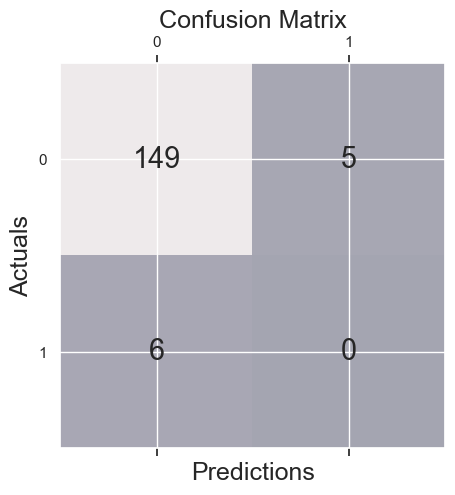

recall_score 0.0
accuracy_score 0.93125
f1_score 0.0
----------------------------------------------------------------
----------------------------------------------------------------


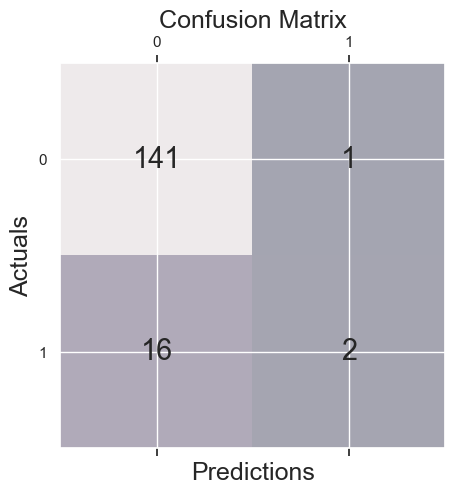

recall_score 0.1111111111111111
accuracy_score 0.89375
f1_score 0.1904761904761905
----------------------------------------------------------------
----------------------------------------------------------------


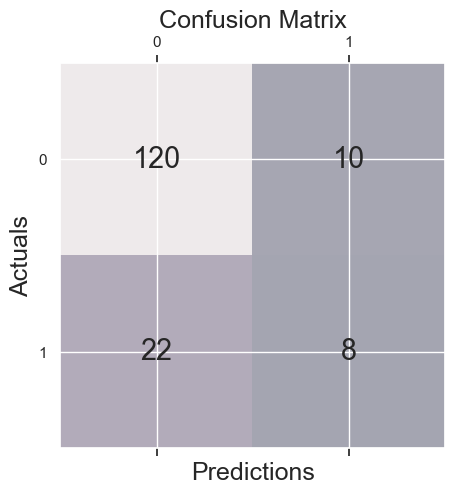

recall_score 0.26666666666666666
accuracy_score 0.8
f1_score 0.33333333333333337
----------------------------------------------------------------
----------------------------------------------------------------


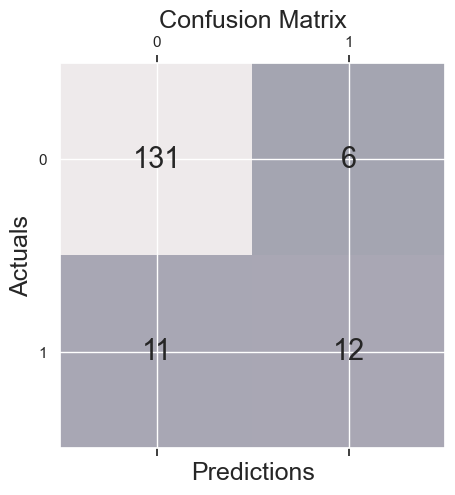

recall_score 0.5217391304347826
accuracy_score 0.89375
f1_score 0.5853658536585366
----------------------------------------------------------------
----------------------------------------------------------------


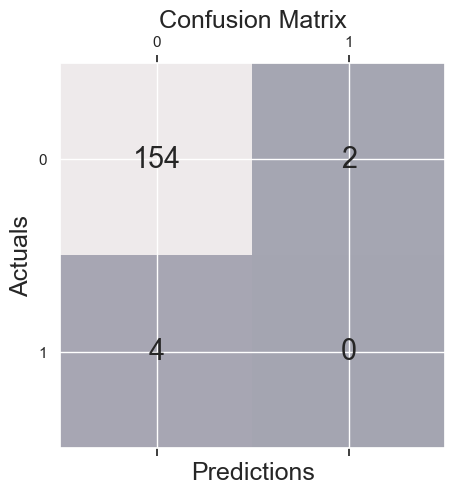

recall_score 0.0
accuracy_score 0.9625
f1_score 0.0
----------------------------------------------------------------
----------------------------------------------------------------


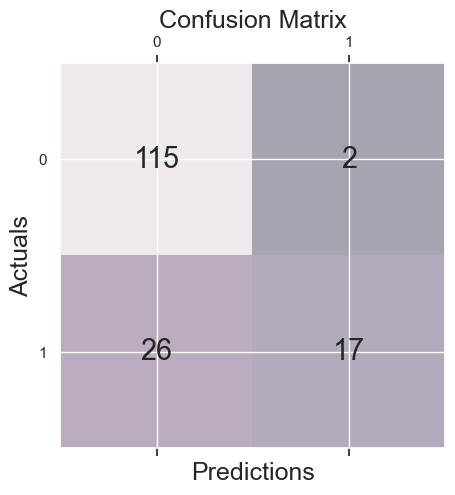

recall_score 0.3953488372093023
accuracy_score 0.825
f1_score 0.5483870967741935
----------------------------------------------------------------
----------------------------------------------------------------


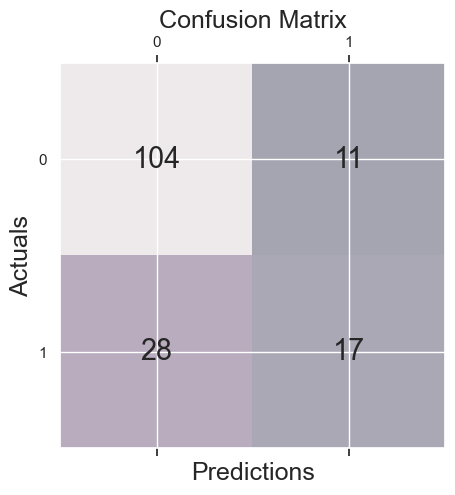

recall_score 0.37777777777777777
accuracy_score 0.75625
f1_score 0.4657534246575342
----------------------------------------------------------------
----------------------------------------------------------------


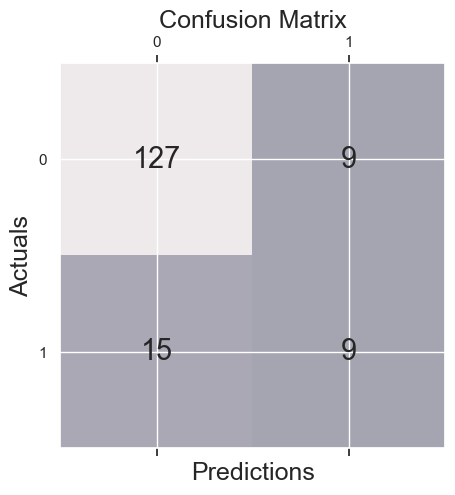

recall_score 0.375
accuracy_score 0.85
f1_score 0.42857142857142855
----------------------------------------------------------------
----------------------------------------------------------------


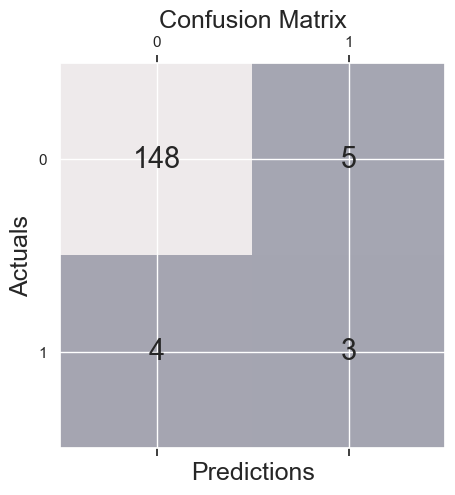

recall_score 0.42857142857142855
accuracy_score 0.94375
f1_score 0.39999999999999997
----------------------------------------------------------------
----------------------------------------------------------------


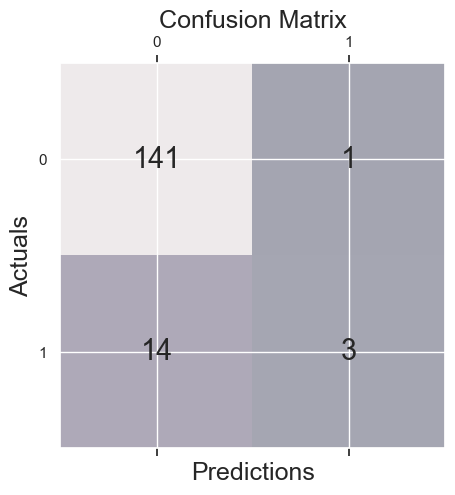

recall_score 0.17647058823529413
accuracy_score 0.9056603773584906
f1_score 0.2857142857142857
----------------------------------------------------------------


In [62]:
# Todo
X_all = scaled[features]
y_all = scaled[target]
kf = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X_all):
    X_train, X_test = X_all.iloc[train_index], X_all.iloc[test_index]
    y_train, y_test = y_all.iloc[train_index], y_all.iloc[test_index]
    lr_classifier_test(X_train, y_train, X_test, y_test)


Print out Confusion Matrix and explain the Four Quadrants

# Todo
Ref https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62


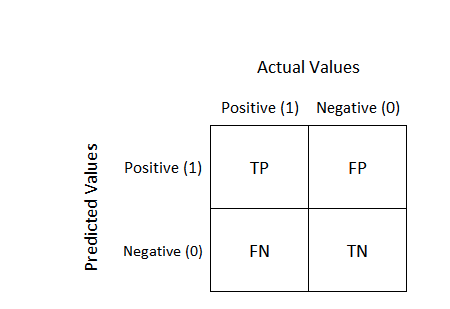

In esccense the confusion matrix gives us an idea of how much the model correctly classified or not.

- TP - True Positives
- TN - True Negative
- FP - False Positive
- FN - False Negative


What's AUC for your Logistic Regression model?

In [53]:
# Todo
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(scaled[target], cv_pred)
print(auc)

0.6447811560084563


Based on https://www.sciencedirect.com/science/article/pii/S1556086415306043#:~:text=In%20general%2C%20an%20AUC%20of,than%200.9%20is%20considered%20outstanding.
we can say this model is not good classifing, as .70 to .80 would be acceptable but we got .64 AUC

#### Regularized Logistic Regression

Build a Binary Classifier with a L2 Regularizer and print out its Confusion Matrix

In [ ]:
# NOTE: For both questions that follow, use solver = 'liblinear' 
# More on why here at the docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# Todo

Build a Binary Classifier with a L1 Regularizer and print out its Confusion Matrix

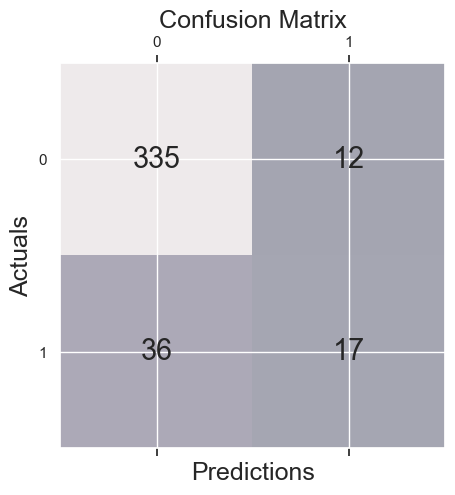

recall_score 0.32075471698113206
accuracy_score 0.88
f1_score 0.41463414634146334


In [64]:
# Todo
clf = LogisticRegression(penalty= 'l1', solver = 'liblinear' )
clf.fit(train_scaled[features],train_scaled[target])
pred = clf.predict(test_scaled[features])
plot_confusion_matrix(test_scaled[target], pred)
auc = roc_auc_score(test_scaled[target], pred)
print("AUC", auc)

0.6430862922081452


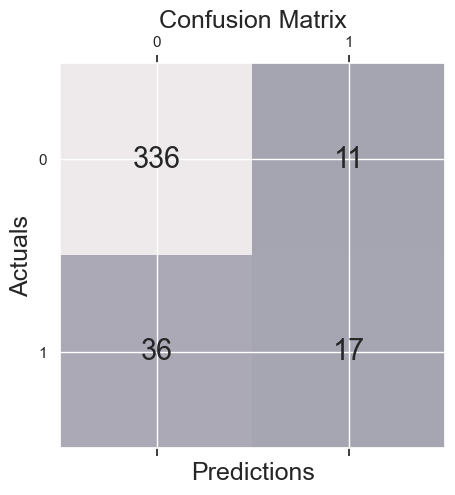

recall_score 0.32075471698113206
accuracy_score 0.8825
f1_score 0.41975308641975306
AUC 0.6445272143983469


In [67]:
# Todo
clf = LogisticRegression(penalty= 'l2', solver = 'liblinear' )
clf.fit(train_scaled[features],train_scaled[target])
pred = clf.predict(test_scaled[features])
plot_confusion_matrix(test_scaled[target], pred)
auc = roc_auc_score(test_scaled[target], pred)
print("AUC", auc)

What's the difference between L1 regularization and L2 regularization?

# Todo


The regression model which uses L1 regularization is called Lasso Regression and model which uses L2 is known as Ridge Regression.

# Ridge Regression (L2 norm).

L2-norm loss function is also known as least squares error (LSE).

w* = minimization of ∑i=1n[log(1+exp(-zi))] + λ*∑ (wj )²

∑ (wj )² is a regularization term and ∑ [log(1+exp(-zi))] is the Loss term. λ is a hyper parameter.

We added the regularization term(i.e. squared magnitude) to the loss term to make sure that the model does not undergo overfit problem.

Here we will minimize both the Loss term and the regularization term. If hyper parameter(λ) is 0 then there is no regularization term then it will overfit and if hyper parameter(λ) is very large then it will add too much weight which leads to underfit.

We can find the best hyper parameter by using cross validation.

# Lasso Regression (L1 norm)

L1-norm loss function is also known as least absolute deviations (LAD), least absolute errors (LAE).

In L1 regularization we use L1 norm instead of L2 norm

w* = argmin ∑[log(1+exp(-zi))] + λ* ||w||1

Here the L1 norm term will also avoid the model to undergo overfit problem. The advantage of using L1 regularization is Sparsity.


#### SGD

Fit a SGD model and perform predictions on test set

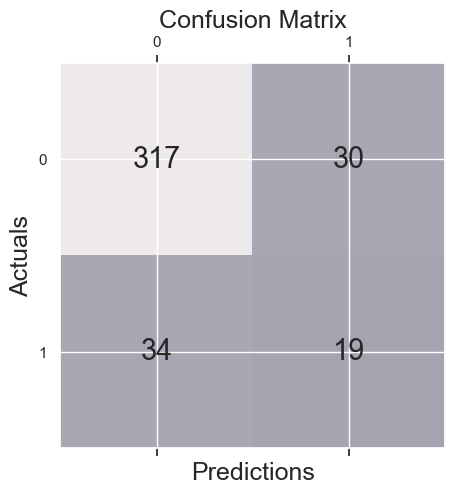

recall_score 0.3584905660377358
accuracy_score 0.84
f1_score 0.37254901960784315


In [34]:
# Todo
from sklearn.linear_model import SGDClassifier

sdg_classifier = SGDClassifier()
sdg_classifier.fit(train_scaled[features], train_scaled[target])
predictions = sdg_classifier.predict(test_scaled[features])
plot_confusion_matrix(test_scaled[target], predictions)


#### Decision Tree

Build a Decision Tree Classifier and perform predictions on test set

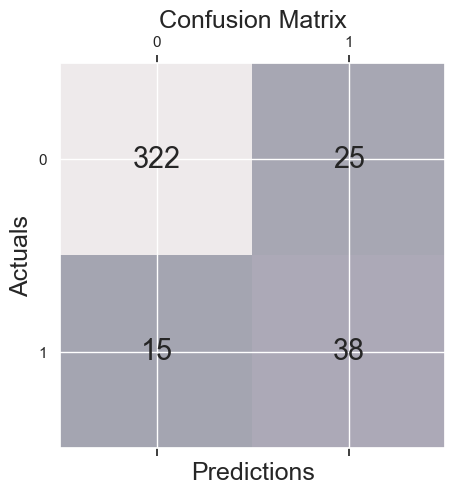

recall_score 0.7169811320754716
accuracy_score 0.9
f1_score 0.6551724137931034


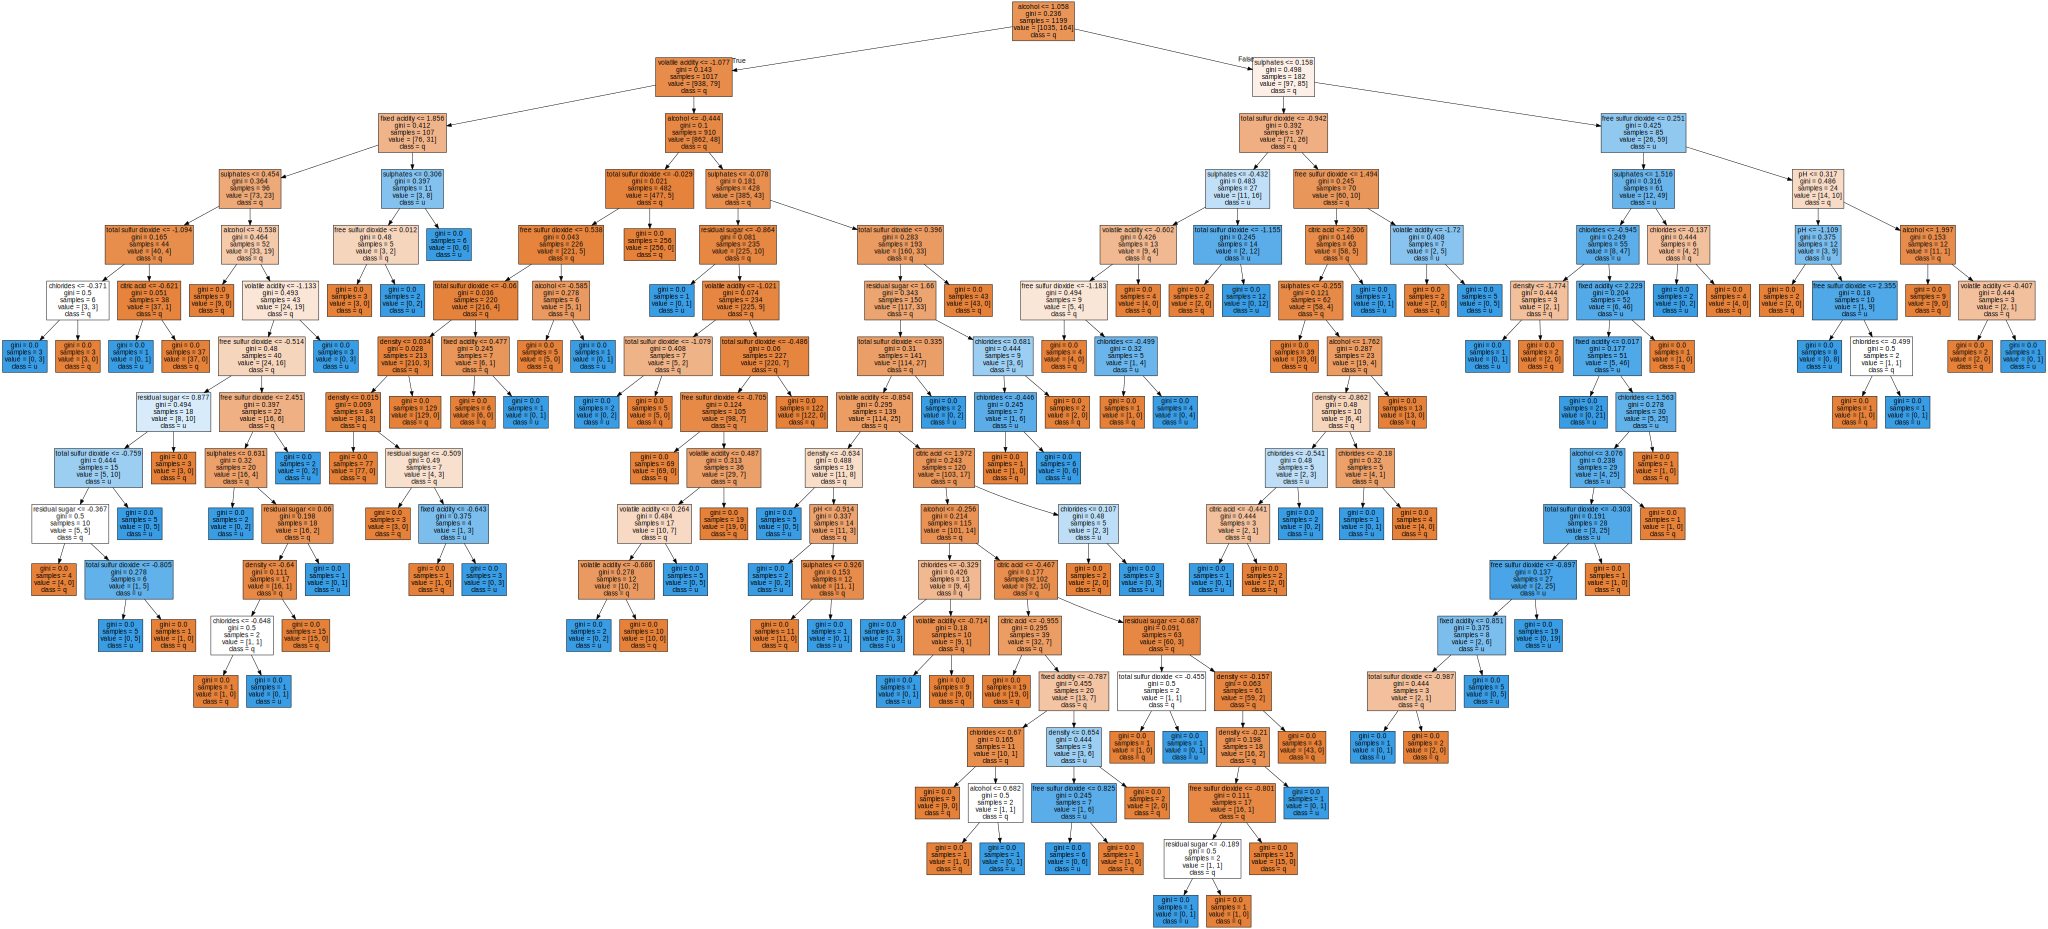

In [58]:
# TODO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(train_scaled[features], train_scaled[target])
predictions = tree_classifier.predict(test_scaled[features])
plot_confusion_matrix(test_scaled[target], predictions)


dot_data = export_graphviz(tree_classifier, out_file=None, 
                                feature_names=features,  
                                class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

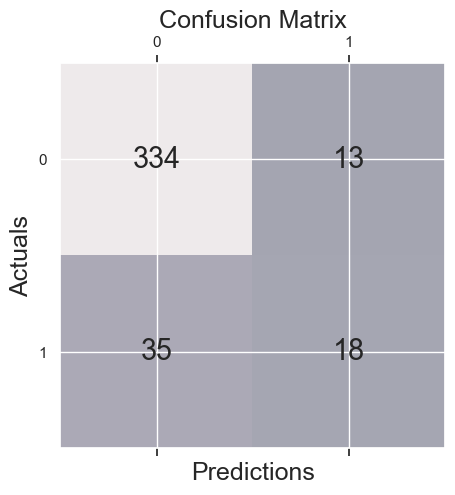

recall_score 0.33962264150943394
accuracy_score 0.88
f1_score 0.42857142857142855


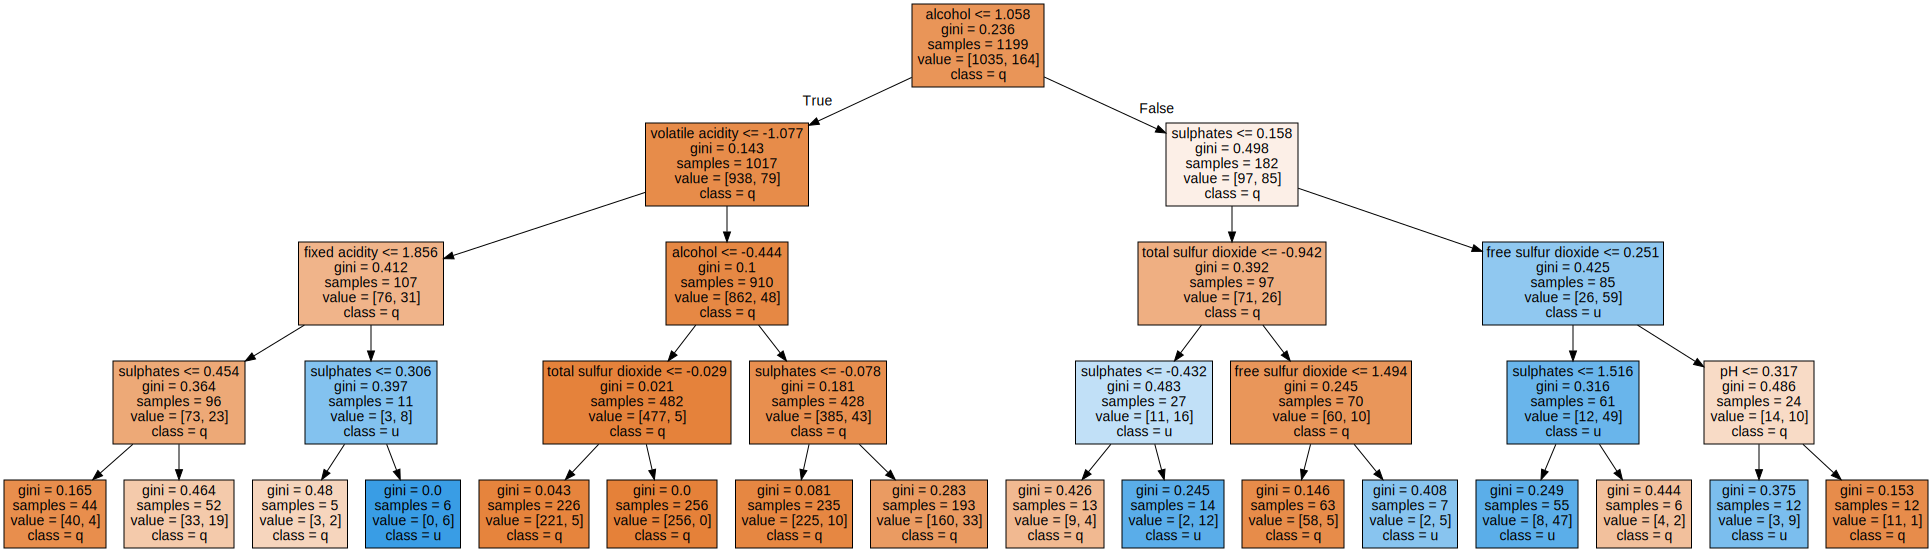

In [60]:
# TODO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

tree_classifier = DecisionTreeClassifier(max_depth=4)
tree_classifier.fit(train_scaled[features], train_scaled[target])
predictions = tree_classifier.predict(test_scaled[features])
plot_confusion_matrix(test_scaled[target], predictions)


dot_data = export_graphviz(tree_classifier, out_file=None, 
                                feature_names=features,  
                                class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

Is there an overfitting issue? How can you tell and how could you solve it?

In [ ]:
# TODO

# The accuracy on the test data us close to the 90% which makes me think is not overfitting, but if we try a max_depth=4 we stay at 88% which could suggest us we dont increase that much 

### Model Comparison

How would you evaluate and compare model performance?

In [61]:
# TODO
# Compared to the rest the three was the had the best performance if we base performance off accuracy on this case

## Submission

Commit your completed **Week11_classification-and-decision-tree.ipynb** notebook to your personal Github repo you shared with the faculty.